**Classification on SMS Spam Collection Dataset**

Chandrashekar Panjhazari, CS 522 Data Mining, Hood College, cp22@hood.edu 

**References**

1) https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

2) https://towardsdatascience.com/how-to-build-your-first-spam-classifier-in-10-steps-fdbf5b1b3870


3) https://towardsdatascience.com/the-f1-score-bec2bbc38aa6#:~:text=The%20F1%20score%20is%20defined,average%20of%20precision%20and%20recall

4) https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

5) https://machinelearningmastery.com/one-class-classification-algorithms/#:~:text=Outliers%20or%20anomalies%20are%20rare,to%20as%20one%2Dclass%20classification

6) https://www.kaggle.com/code/snehithatiger/spam-or-ham-classification/notebook

7) https://www.kaggle.com/code/dejavu23/sms-spam-or-ham-beginner

8) https://www.kaggle.com/code/karnikakapoor/spam-or-ham-sms-classifier

9) https://github.com/prince381/spam_detection/blob/master/model_training.ipynb

10) https://medium.com/ai-techsystems/spam-text-classification-on-cainvas-c0861db9393b

**What is SMS Spam Filtering?**

Spam is any unwanted communication that is routinely sent in bulk via the internet or an electronic messaging service. On mobile devices, unwanted text messages are often sent by bots or random numbers. It is challenging to prevent cell phone spamming in practice due to the lower SMS usage rate, which has encouraged many consumers and network operators to ignore the issue, as well as the limited availability of mobile phone spam-filtering software.

**Why this Project?**

Lack of publicly available datasets for SMS spam, which are essential for validating and contrasting multiple classifiers, is a serious drawback in academic environments. Furthermore, since SMS messages are frequently short, content-based spam filters might not work well. In this study, we assess the performance of a variety of well-known machine learning methods.

**Dataset**

The UCI Machine Learning Repository is where the data set was first collected.The SMS Spam Collection is a corpus of labeled SMS messages that is available to the general public and was compiled for research on spam SMS on mobile devices. It is open to the public and has 1,002 ham SMS messages and 322 spam messages. The file contains one message per line. Each line has two columns: v1, which carries the label (such as "ham" or "spam"), and v2, which holds the text. There are 2 attributes and 5169 unique values in the data set. There are no blank values in this collection of datasets.

In [54]:
#importing all required libraries for this Project

import numpy as np                         
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud

import re
import nltk
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [55]:
#loading the dataset file

df = pd.read_csv('spam.csv' , encoding = 'latin')

In [56]:
#looking at the first rows of the dataframe

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [57]:
#displaying information about dataset file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
#checking for missing values

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [59]:
#dropping the columns which are not required for this project 

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [60]:
#looking at the first rows of the dataframe

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
#renaming the columns with meaningful names

df.rename(columns = {'v1':'Type', 'v2':'Message'}, inplace = True)

In [62]:
#looking at the first rows of the dataframe

df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
#displaying the number count of spam & ham

df['Type'].value_counts()

ham     4825
spam     747
Name: Type, dtype: int64

In [64]:
#dropping the duplicate values

df = df.drop_duplicates()

In [65]:
#displaying the number count of spam & ham after removing duplicate values

df['Type'].value_counts()

ham     4516
spam     653
Name: Type, dtype: int64

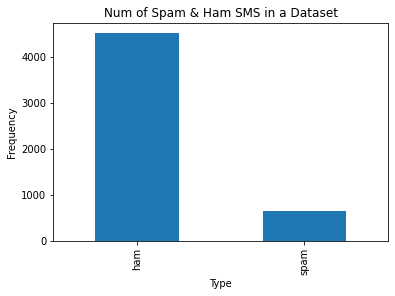

In [66]:
#plotting a graph for displaying the count difference of ham & spam

plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Num of Spam & Ham SMS in a Dataset')
df.Type.value_counts().plot.bar();


In [67]:
#using word cloud to visualize the texts from spam & ham

def show_wordcloud(df_spam_or_ham, title):
    text = ' '.join(df_spam_or_ham['Message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='autumn', width=800, height=600).generate(text)
    
    plt.figure(figsize=(15,10), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.title(title, fontsize=20 )
    plt.show()


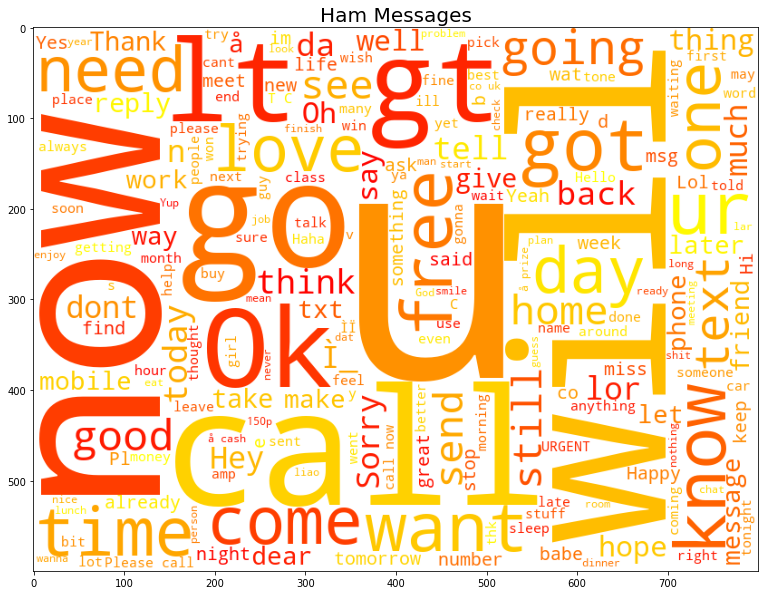

In [68]:
show_wordcloud(df, "Ham Messages")

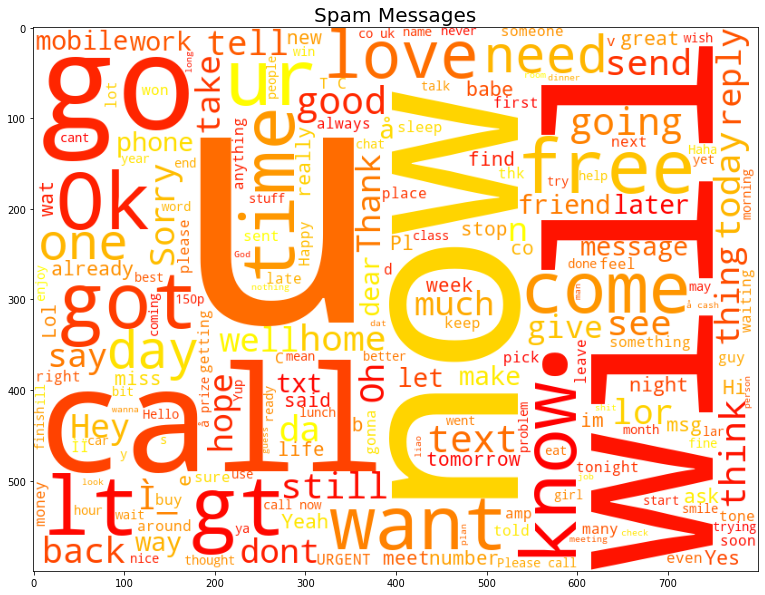

In [69]:
show_wordcloud(df, "Spam Messages")

In [70]:
#for data exploration using this column for number count of characters, words and sentences

df["Num_of_Characters"] = df["Message"].apply(len)
df["Num_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["Message"]), axis=1).apply(len)
df["Num_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["Message"]), axis=1).apply(len)
df.describe().T




,count,mean,std,min,25%,50%,75%,max
Num_of_Characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
Num_of_Words,5169.0,18.453279,13.324793,1.0,9.0,15.0,26.0,220.0
Num_of_sentence,5169.0,1.947185,1.362406,1.0,1.0,1.0,2.0,28.0


<Figure size 1080x720 with 0 Axes>

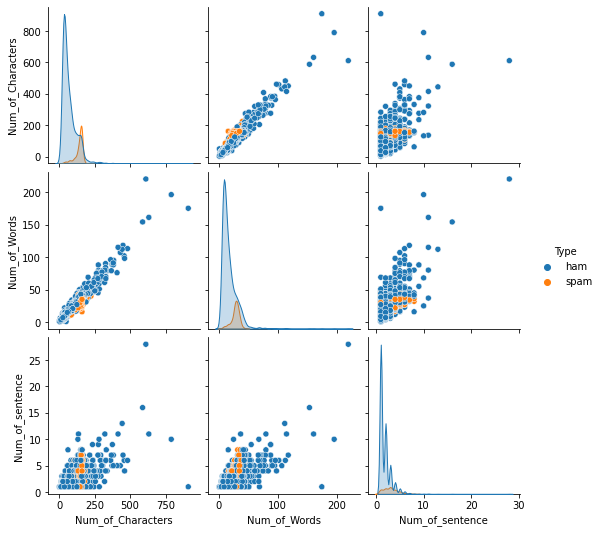

In [71]:
plt.figure(figsize=(15,10))
fg = sns.pairplot(data=df, hue="Type")
plt.show(fg)

In [72]:
#we are dropping the outliers

df = df[(df["Num_of_Characters"]<350)]
df.shape


(5149, 5)

In [73]:
#displaying the first 5 messages of column message 

print("The First 5 Messages:",*df["Message"][:5], sep = "\n")

The First 5 Messages:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [74]:
#here we clean the messages by removing all non-alphabetic characters and converting alphabets into lower case

def Clean(Message):
    sms = re.sub('[^a-zA-Z]', '  ', Message) 
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

df["Clean_Message"] = df["Message"].apply(Clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [75]:
#displaying the first 5 messages after cleaning is done

print("The First 5 Messages after cleaning:",*df["Clean_Message"][:5], sep = "\n")

The First 5 Messages after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


In [76]:
#Tokenization

df["Tokenize_Message"]=df.apply(lambda row: nltk.word_tokenize(row["Clean_Message"]), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
print("The First 5 Messages after Tokenized:",*df["Tokenize_Message"][:5], sep = "\n")

The First 5 Messages after Tokenized:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


In [78]:
#removing stopwords

def remove_stopwords(Message):
    stop_words = set(stopwords.words("english"))
    filtered_Message = [word for word in Message if word not in stop_words]
    return filtered_Message

df["Nostopword_Message"] = df["Tokenize_Message"].apply(remove_stopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
print("The First 5 Messages after removing StopWords:",*df["Nostopword_Message"][:5], sep = "\n")

The First 5 Messages after removing StopWords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


In [80]:
#applying lemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatizer_words(Message):
    lemmatizes = [lemmatizer.lemmatize(word, pos ='v') for word in Message]
    return lemmatizes

df["Lemmatized_Message"] = df["Nostopword_Message"].apply(lemmatizer_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
print("The First 5 Messages after Lemmatizing:",*df["Lemmatized_Message"][:5], sep = "\n")

The First 5 Messages after Lemmatizing:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


In [82]:
#creating a collection of text message & covert them into Vectorizer 

collection= []
for i in df["Lemmatized_Message"]:
    msg = ' '.join([row for row in i])
    collection.append(msg)    

In [83]:
print("The First 5 Messages of collection:",*collection[:5], sep = "\n")

The First 5 Messages of collection:
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [84]:
#converting the text messages into numerical values

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(collection).toarray()

In [85]:
X.dtype

dtype('float64')

In [86]:
#label encoding the Type to use it as Y

label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [87]:
#Intializing the values for labels & feature as Y and X(we already assigned X in vectorizing)

Y = df["Type"] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=5)

In [88]:
#pipeline

classifiers = [MultinomialNB(), RandomForestClassifier(), KNeighborsClassifier(), SVC()]
for classification in classifiers:
    classification.fit(X_train, Y_train) 

pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVM"}                 

In [89]:
#crossvalidating the classifiers

for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,Y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.942895 
RandomForest: 0.969309 
KNeighbours: 0.901716 
SVM: 0.964644 


In [90]:
#validating the models

precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(Y_test, pred_test)
    recal = metrics.recall_score(Y_test, pred_test)
    f1_s = metrics.f1_score(Y_test, pred_test)
    train_accuracy = model.score(X_train,Y_train)
    test_accuracy = model.score(X_test,Y_test)
  
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)


In [91]:
#assigning list to dataframe

df = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}


In [92]:
#assigning the dataframe to Results

Results = pd.DataFrame(df, index =["NaiveBayes", "RandomForest", "KNeighbours","SVM"])

In [93]:
#displaying Final Results

Results.style.background_gradient(cmap="autumn")

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,1.000000,0.577381,0.732075,0.958835,0.997669
RandomForest,0.991837,0.723214,0.836489,0.958835,0.997669
KNeighbours,1.000000,0.208333,0.344828,0.958835,0.997669
SVM,1.000000,0.684524,0.812721,0.958835,0.997669
